In [1]:
#MPRO2_U3_AC

#Librerias
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np

In [2]:

#Microsoft, Amazon, Testla, Apple, Facebook & Google
stocks = ["MSFT", "AMZN", "TSLA", "AAPL", "FB", "GOOGL"]

#Datos del 01/ene/2016 al 19/nov/2020
data = web.DataReader(stocks, data_source="yahoo", start="01/01/2016")["Adj Close"]

#Precios
prices = pd.DataFrame(data)

#Retornos
returns = prices.pct_change()
returns = pd.DataFrame(returns)

In [3]:
prices.tail()

Symbols,MSFT,AMZN,TSLA,AAPL,FB,GOOGL
Date,,,,,,
2020-11-13,215.944641,3128.810059,408.500000,119.260002,276.950012,1772.260010
2020-11-16,216.662766,3131.060059,408.089996,120.300003,278.959991,1774.030029
2020-11-17,213.900009,3135.659912,441.609985,119.389999,275.000000,1761.660034
2020-11-18,211.080002,3105.459961,486.640015,118.029999,271.970001,1740.640015
2020-11-19,211.029999,3114.985107,505.515594,118.200798,272.649994,1748.665039


In [4]:
returns.tail()

Symbols,MSFT,AMZN,TSLA,AAPL,FB,GOOGL
Date,,,,,,
2020-11-13,0.004967,0.005958,-0.007917,0.000419,0.006798,0.016892
2020-11-16,0.003326,0.000719,-0.001004,0.008720,0.007258,0.000999
2020-11-17,-0.012751,0.001469,0.082139,-0.007564,-0.014196,-0.006973
2020-11-18,-0.013184,-0.009631,0.101968,-0.011391,-0.011018,-0.011932
2020-11-19,-0.000237,0.003067,0.038788,0.001447,0.002500,0.004610


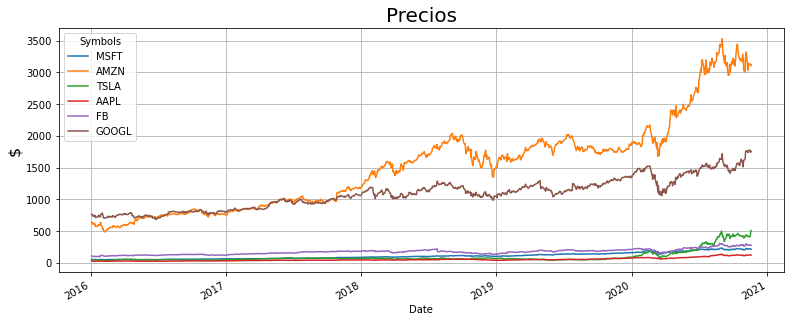

In [28]:
#Gráfica de Precios
prices.plot(figsize=(13,5))
plt.title("Precios", fontsize=20)
plt.ylabel("$",fontsize=16)
plt.grid()
plt.show()

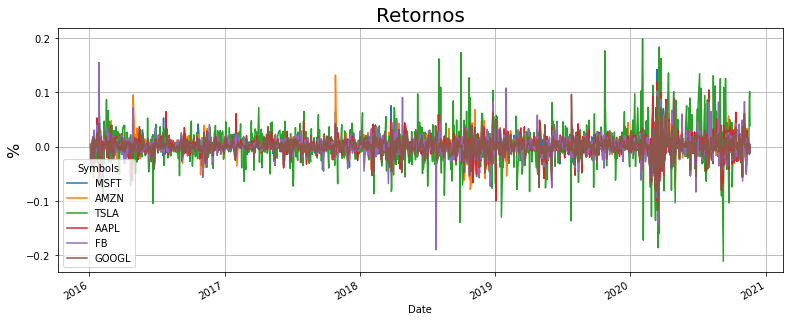

In [29]:
#Gráfica de Retornos
returns.plot(figsize=(13,5))
plt.title("Retornos", fontsize=20)
plt.ylabel("%",fontsize=16)
plt.grid()
plt.show()

In [6]:
#Estadísticas Básicas de los retornos diarios
returns.describe()

Symbols,MSFT,AMZN,TSLA,AAPL,FB,GOOGL
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,0.001327,0.001475,0.002633,0.001472,0.001017,0.000818
std,0.017617,0.019231,0.036357,0.019050,0.020865,0.016688
min,-0.147390,-0.079221,-0.210628,-0.128647,-0.189609,-0.116342
25%,-0.005851,-0.006813,-0.014280,-0.005858,-0.007274,-0.005774
50%,0.001284,0.001507,0.001237,0.001005,0.001198,0.001219
75%,0.009159,0.010682,0.018966,0.010099,0.010927,0.009175
max,0.142169,0.132164,0.198949,0.119808,0.155214,0.096202


In [31]:
#Retornos anuales
#Existen 252 dias de trading
returns.mean()*252 

Symbols
MSFT     0.334279
AMZN     0.371773
TSLA     0.663568
AAPL     0.370895
FB       0.256291
GOOGL    0.206102
dtype: float64

In [38]:
#Riesgo anual
returns.std()* np.sqrt(252)

Symbols
MSFT     0.279666
AMZN     0.305283
TSLA     0.577153
AAPL     0.302404
FB       0.331216
GOOGL    0.264906
dtype: float64

In [39]:
#Matriz de covarianza
returns.cov()*252

Symbols,MSFT,AMZN,TSLA,AAPL,FB,GOOGL
Symbols,,,,,,
MSFT,0.078213,0.058547,0.067084,0.060794,0.058807,0.058141
AMZN,0.058547,0.093198,0.064969,0.055292,0.063135,0.053798
TSLA,0.067084,0.064969,0.333106,0.068992,0.061957,0.056388
AAPL,0.060794,0.055292,0.068992,0.091448,0.058417,0.052793
FB,0.058807,0.063135,0.061957,0.058417,0.109704,0.060825
GOOGL,0.058141,0.053798,0.056388,0.052793,0.060825,0.070175


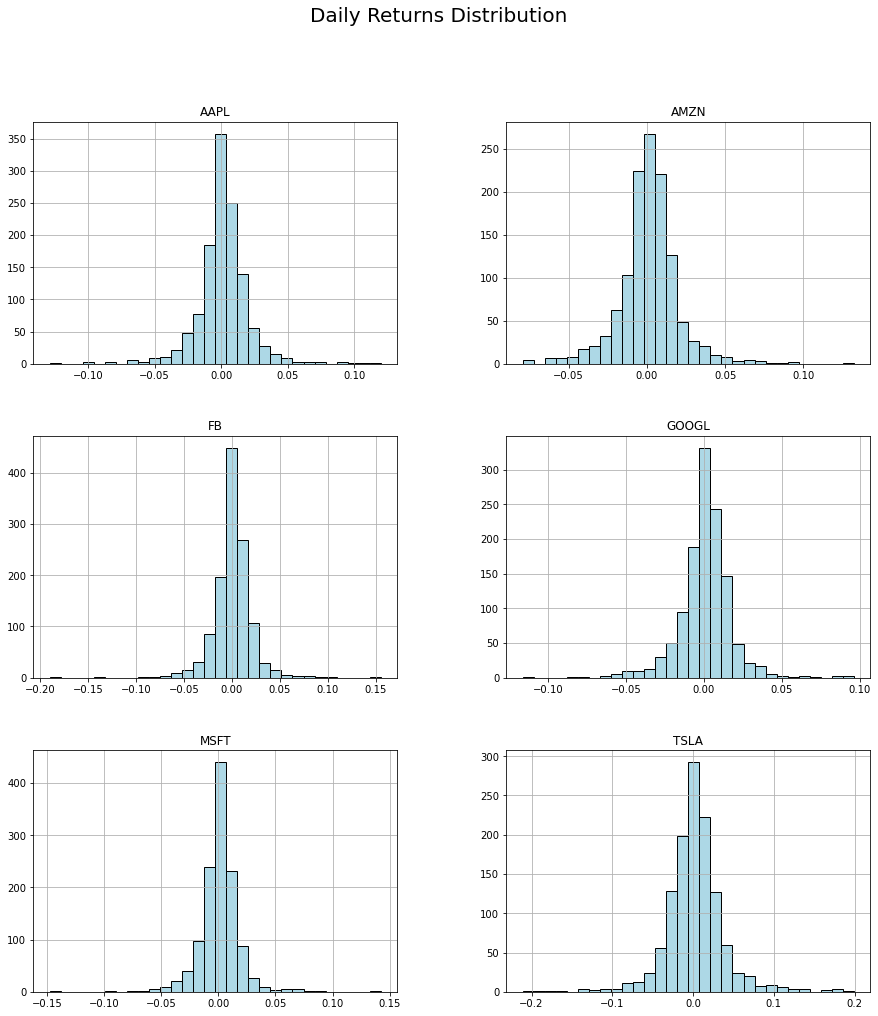

In [7]:
#Distribución de los retornos
returns.hist(figsize=(15,16), color="lightblue", ec="black", bins=30)
plt.suptitle("Daily Returns Distribution", fontsize=20)
plt.show()

In [8]:
#Posibles portafolios 

#prets = portfolio returns, pvols = portfolio volatility
prets = []
pvols = []

#6 empresas, v = 6
v = len(returns.columns)

for i in range(2000):
    
    #Ponderación del portafolio para las v empresas
    weights = np.random.random(v)
    weights /= np.sum(weights)
    
    #retorno de las v empresas para 252 días de trading
    prets.append(np.sum(returns.mean() * weights *252))
    
    #riesgo de las v empresas
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() *252, weights))))

prets = np.array(prets)
pvols = np.array(pvols)

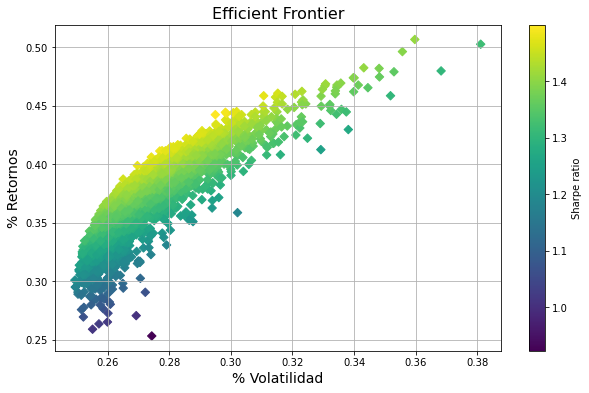

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(pvols, prets, c=(prets/pvols), marker="D", cmap="viridis")
plt.title("Efficient Frontier", fontsize=16)
plt.xlabel("% Volatilidad", fontsize=14)
plt.ylabel("% Retornos", fontsize=14)
plt.colorbar(label='Sharpe ratio')
plt.grid()
plt.show()

In [14]:
#Estadisticas básicas
def stats(weights):
    weights = np.array(weights)
    #Retornos promedios anuales
    pret = np.sum(returns.mean() * weights *252)
    #Volatilidad Anual
    pvol = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    #Retornos, Volatilidad & Sharpe Ratio del Portafolio
    return np.array([pret, pvol, pret / pvol])


#Función a Minimizar
def min_func_sharpe(weights):
    return -stats(weights)[2] #sharpe ratio

In [15]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(v))

# Optimización con restricciones - Constraint optimization
import scipy.optimize as so
optim = so.minimize(min_func_sharpe, v * [1 / v,], method='SLSQP',
                    bounds=bnds, constraints=cons)
optim

     fun: -1.5072581726089336
     jac: array([ 1.21474266e-04,  3.45796347e-04, -2.81751156e-04, -2.18153000e-04,
        2.22864628e-01,  2.82938316e-01])
 message: 'Optimization terminated successfully'
    nfev: 50
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.21322935e-01, 3.38857940e-01, 2.22306010e-01, 3.17513115e-01,
       6.65700134e-17, 0.00000000e+00])

In [18]:
#Ponderaciones optimas
w = optim.x.round(5)

print("Ponderaciones Optimas: \n")
for i in range(len(w)):
    print(returns.columns[i],"w:" , str(w[i]*100) +"%")

Ponderaciones Optimas: 

MSFT w: 12.132%
AMZN w: 33.886%
TSLA w: 22.231%
AAPL w: 31.751%
FB w: 0.0%
GOOGL w: 0.0%


In [19]:
#Retornos, Volatilidad y Sharpe Ratio del Portafolio
stats(w)

array([0.43181452, 0.28649008, 1.50725817])

In [44]:
print('Resumen de Portafolio: \n')
print("Retornos:", str(round(stats(w)[0],4)*100) +'%')
print("Riesgo:", str(round(stats(w)[1],4)*100) +'%')

Resumen de Portafolio: 

Retornos: 43.18%
Riesgo: 28.65%


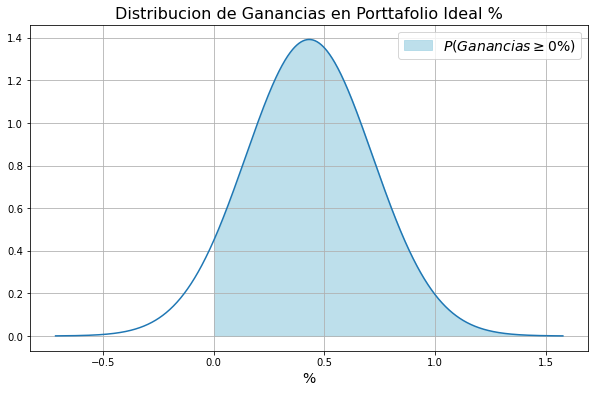

In [25]:
#Datos a graficar
ret = stats(w)[0]
vol = stats(w)[1]

x_min = ret - 4*vol
x_max = ret + 4*vol

x = np.linspace(x_min, x_max, 1000)
y = ss.norm.pdf(x, ret, vol) #normal pdf wit mu = ret & sigma = vol

#Gráfica
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.fill_between(x,y, where=[(x>=0) for x in x],
                 label="$P(Ganancias \geq 0\%)$",
                alpha=0.8, color="lightblue")
plt.title("Distribucion de Ganancias en Porttafolio Ideal %", fontsize=16)
plt.xlabel("%", fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.show()

In [26]:
print("Probabilidad de tener ganancias >= 0%")
P = 1 - ss.norm.cdf(0,ret, vol)
print(round(P,5) )

Probabilidad de tener ganancias >= 0%
0.93413
